In [39]:
import kagglehub # Import dataset from KaggleHub

path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: /Users/kareemelnaghy/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8


In [40]:
import pandas as pd # read the csv and store it in a dataframe
import os

print(os.listdir(path))
df = pd.read_csv(os.path.join(path, "StudentPerformanceFactors.csv"), sep=',')

['StudentPerformanceFactors.csv']


In [41]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [42]:
score_features = ['Attendance', 'Previous_Scores', 'Hours_Studied', 'Exam_Score']

In [43]:
score_df = df[score_features]

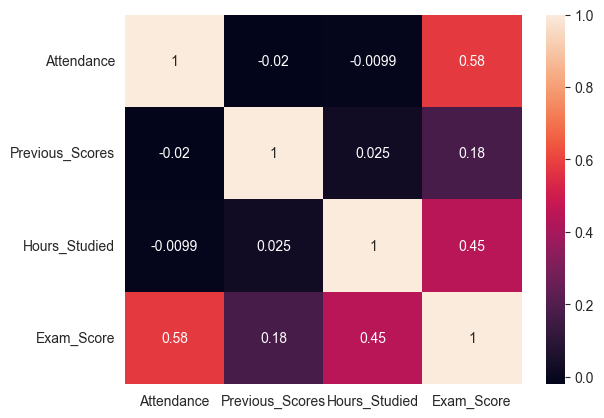

In [44]:
import seaborn as sns # plotted a heatmap to visualize the correlation between the features
import matplotlib.pyplot as plt

numeric_df = score_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

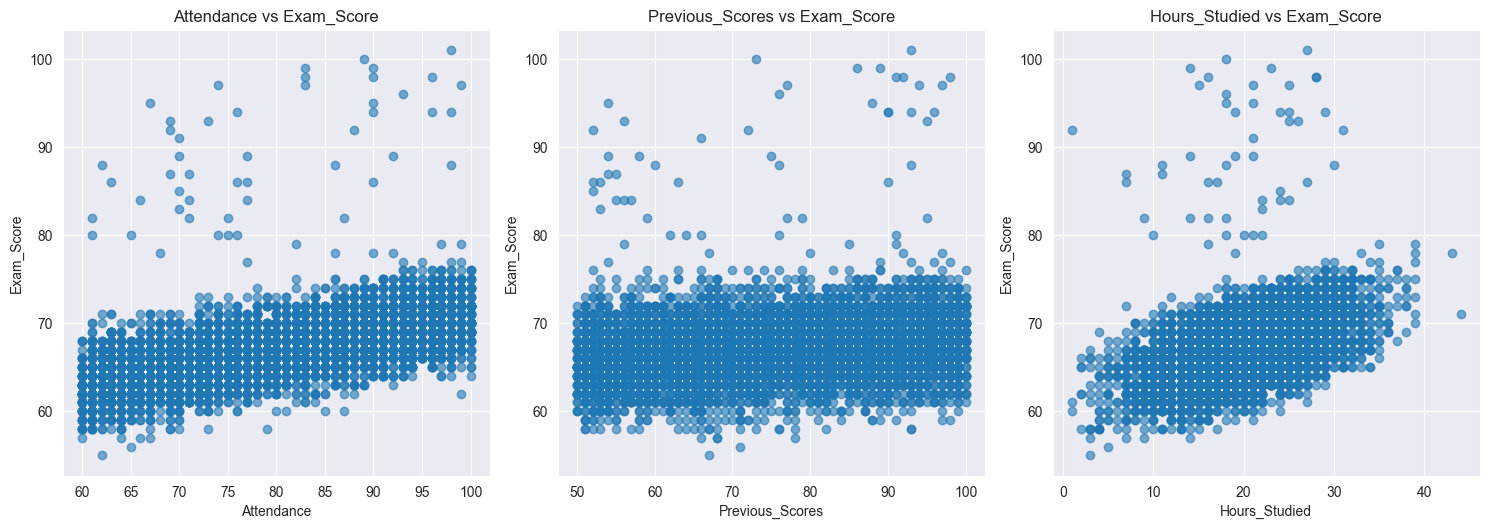

In [45]:
import matplotlib.pyplot as plt

features = [col for col in score_df.columns if col != 'Exam_Score']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(score_df[feature], score_df['Exam_Score'], alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Exam_Score')
    plt.title(f'{feature} vs Exam_Score')

plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split # split the data into training and testings sets

score_df.dropna(inplace=True, axis=0)
X = score_df.drop(columns=['Exam_Score', 'Previous_Scores', 'Attendance'])
Y = score_df['Exam_Score']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


/var/folders/c7/wcg4vb5s3tb677kq8px332h80000gn/T/ipykernel_3843/2296850872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.dropna(inplace=True, axis=0)


In [47]:
X.describe()

,Hours_Studied
count,6607.000000
mean,19.975329
std,5.990594
min,1.000000
25%,16.000000
50%,20.000000
75%,24.000000
max,44.000000


In [48]:
from sklearn.linear_model import LinearRegression  # create linear regression model and fit
model = LinearRegression()
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
predictions = model.predict(X_test)

In [50]:
X_test.head()

,Hours_Studied
743,20
5551,22
3442,21
6571,12
4204,21


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Predictions for the first 5 students:")
print(predictions[:5])
print("Actual scores for the first 5 students:")
print(Y_test.head().values)

print("Mean Squared Error:", mean_squared_error(Y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predictions))
print("R-squared:", r2_score(Y_test, predictions))


Predictions for the first 5 students:
[67.22454236 67.79587985 67.5102111  64.9391924  67.5102111 ]
Actual scores for the first 5 students:
[65 65 71 64 66]
Mean Squared Error: 10.855921288793322
Mean Absolute Error: 2.4475687452945647
R-squared: 0.2319868674542105


In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False) # transform the features into polynomial features
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
poly_predictions = poly_model.predict(X_poly_test)

/Users/kareemelnaghy/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/kareemelnaghy/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/kareemelnaghy/PyCharmMiscProject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [54]:
print("Predictions for the first 5 students:")
print(poly_predictions[:5])
print("Actual scores for the first 5 students:")
print(Y_test.head().values)

print("Mean Squared Error:", mean_squared_error(Y_test, poly_predictions))
print("Mean Absolute Error:", mean_absolute_error(Y_test, poly_predictions))
print("R-squared:", r2_score(Y_test, poly_predictions))


Predictions for the first 5 students:
[67.17745598 67.7559337  67.4654087  64.97243944 67.4654087 ]
Actual scores for the first 5 students:
[65 65 71 64 66]
Mean Squared Error: 10.843834094915021
Mean Absolute Error: 2.44451162121857
R-squared: 0.23284198821155666


In [55]:
print("Linear Regression:")
print("MSE:", mean_squared_error(Y_test, predictions))
print("MAE:", mean_absolute_error(Y_test, predictions))
print("R-squared:", r2_score(Y_test, predictions))

print("\nPolynomial Regression:")
print("MSE:", mean_squared_error(Y_test, poly_predictions))
print("MAE:", mean_absolute_error(Y_test, poly_predictions))
print("R-squared:", r2_score(Y_test, poly_predictions))


Linear Regression:
MSE: 10.855921288793322
MAE: 2.4475687452945647
R-squared: 0.2319868674542105

Polynomial Regression:
MSE: 10.843834094915021
MAE: 2.44451162121857
R-squared: 0.23284198821155666


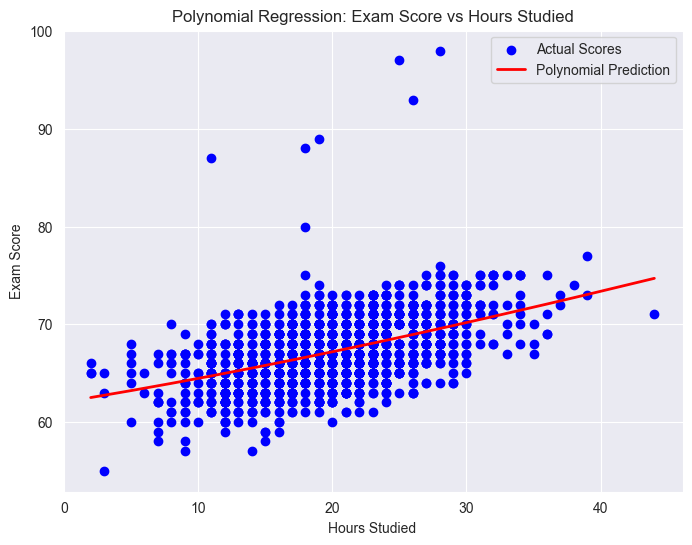

In [60]:
import matplotlib.pyplot as plt
import numpy as np

hours_test = X_test['Hours_Studied'].values
actual_scores = Y_test.values
predicted_scores = poly_predictions

# sort data based on hours studied to ensure a smooth line in the plot
sort_index = np.argsort(hours_test)
hours_sorted = hours_test[sort_index]
actual_sorted = actual_scores[sort_index]
predicted_sorted = predicted_scores[sort_index]

plt.figure(figsize=(8, 6))
plt.scatter(hours_sorted, actual_sorted, color='blue', label='Actual Scores')
plt.plot(hours_sorted, predicted_sorted, color='red', label='Polynomial Prediction', linewidth=2)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Polynomial Regression: Exam Score vs Hours Studied')
plt.legend()
plt.show()

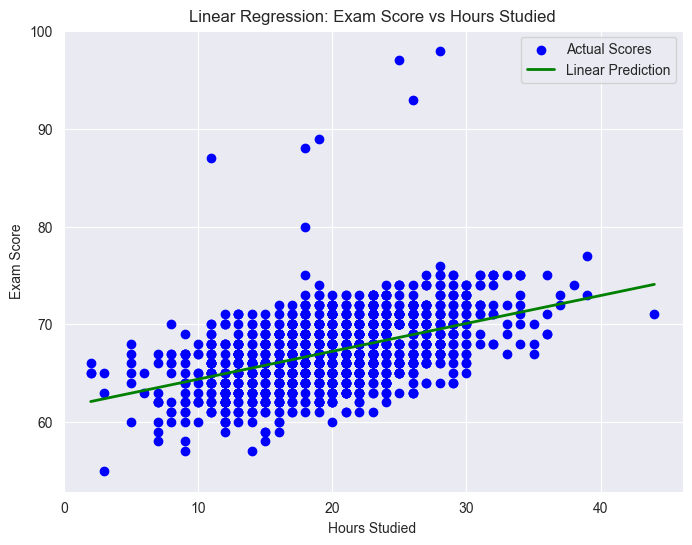

In [57]:
hours_test = X_test['Hours_Studied'].values
actual_scores = Y_test.values
predicted_scores = predictions

sort_index = np.argsort(hours_test)
hours_sorted = hours_test[sort_index]
actual_sorted = actual_scores[sort_index]
predicted_sorted = predicted_scores[sort_index]

plt.figure(figsize=(8, 6))
plt.scatter(hours_sorted, actual_sorted, color='blue', label='Actual Scores')
plt.plot(hours_sorted, predicted_sorted, color='green', label='Linear Prediction', linewidth=2)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Exam Score vs Hours Studied')
plt.legend()
plt.show()